In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn import neighbors, naive_bayes, tree, svm

# 1
Исследуйте зависимость качества классификации от количества классификаторов в ансамбле для алгоритмов бэггинга на наборе данных glass.csv с различными базовыми классификаторами. Постройте графики зависимости качества классификации при различном числе классификаторов, объясните полученные результаты.

In [2]:
filename = 'glass.csv'
prefix = os.readlink('requisites')
path = os.path.join(prefix, filename)
df = pd.read_csv(path, index_col=0)

In [3]:
data = df.to_numpy()
X, y = data[:, :-1], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
for i in range(50, 100):
    try:
        clf = BaggingClassifier(naive_bayes.GaussianNB(), n_estimators=50, n_jobs=1, max_features=.2)
        clf.fit(X_train, y_train)
    except:
        print(i, clf.get_params())
        break

In [4]:
results = {}
clf_names = ('Bayes', 'kNN', 'Tree', 'SVM')
clfs = (naive_bayes.GaussianNB, neighbors.KNeighborsClassifier, tree.DecisionTreeClassifier, svm.SVC)
params = (
    {},
    {'n_neighbors': 3},
    {'max_depth': 3},
    {}
)

for clf_name, classifier, kwargs in zip(clf_names, clfs, params):
    print(clf_name)
    results[clf_name] = []
    for n_estimators in range(1, 51):
        try:
            clf = BaggingClassifier(classifier(**kwargs), n_estimators=n_estimators, max_features=.2)
            clf.fit(X_train, y_train)
            results[clf_name].append(clf.score(X_test, y_test))
        except:
            print(n_estimators)
            break

Bayes
kNN
Tree
SVM


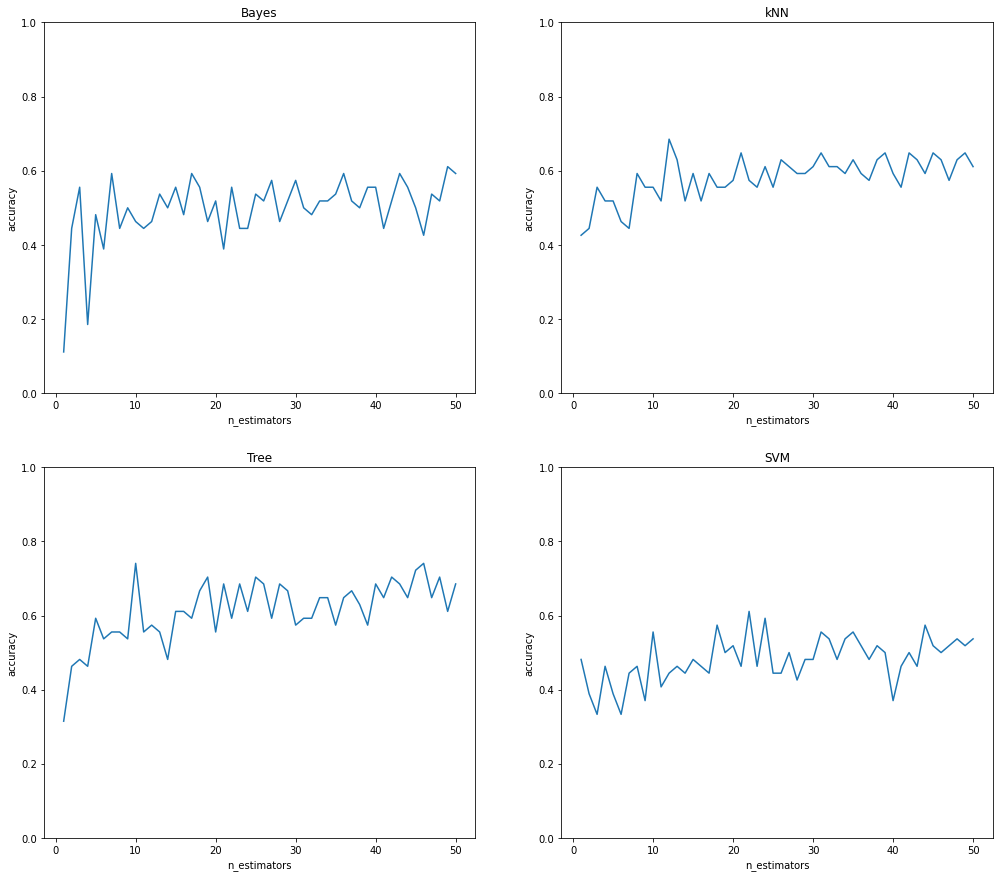

In [5]:
x_vals = list(range(1, 51))

fig = plt.figure(figsize=(17, 15))
for i, (k, v) in enumerate(results.items()):
    ax = fig.add_subplot(2, 2, i+1)
    ax.set_title(k)
    ax.plot(x_vals, v)
    ax.set_xlabel('n_estimators')
    ax.set_ylabel('accuracy')
    ax.set_ylim(0., 1.)
plt.show()

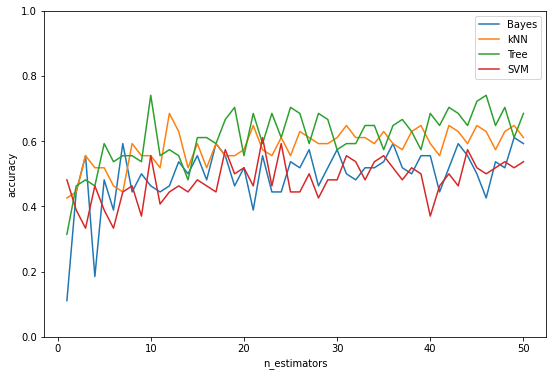

In [6]:
x_vals = list(range(1, 51))
fig = plt.figure(figsize=(9, 6))
legend = list(clf_names)
ax = plt.gca()
ax.set_xlabel('n_estimators')
ax.set_ylabel('accuracy')
ax.set_ylim(0., 1.)
for k, v in results.items():
    ax.plot(x_vals, v)
plt.legend(labels=legend)
plt.show()

# 2

Исследуйте зависимость качества классификации от количества классификаторов в ансамбле для алгоритма бустинга (например, AdaBoost) на наборе данных vehicle.csv с различными базовыми классификаторами. Постройте графики зависимости качества классификации при различном числе классификаторов, объясните полученные результаты.

In [7]:
filename = 'vehicle.csv'
prefix = os.readlink('requisites')
path = os.path.join(prefix, filename)

conversion_dict = {'van': 0, 'saab': 1, 'bus': 2, 'opel': 3}

df = pd.read_csv(path, converters={'Class': lambda x: conversion_dict[x]})

In [8]:
data = df.to_numpy()
X, y = data[:, :-1], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
results = {}
clf_names = ('Bayes', 'Tree', 'SVM')
clfs = (naive_bayes.GaussianNB, tree.DecisionTreeClassifier)  # , svm.SVC)
params = (
    {},
    {'max_depth': 1})  # ,
    # {}
# )

for clf_name, classifier, kwargs in zip(clf_names, clfs, params):
    results[clf_name] = []
    print(clf_name)
    for n_estimators in range(1, 101):
        clf = AdaBoostClassifier(base_estimator=classifier(**kwargs), n_estimators=n_estimators,algorithm='SAMME.R')
        clf.fit(X_train, y_train)
        results[clf_name].append(clf.score(X_test, y_test))

Bayes
Tree


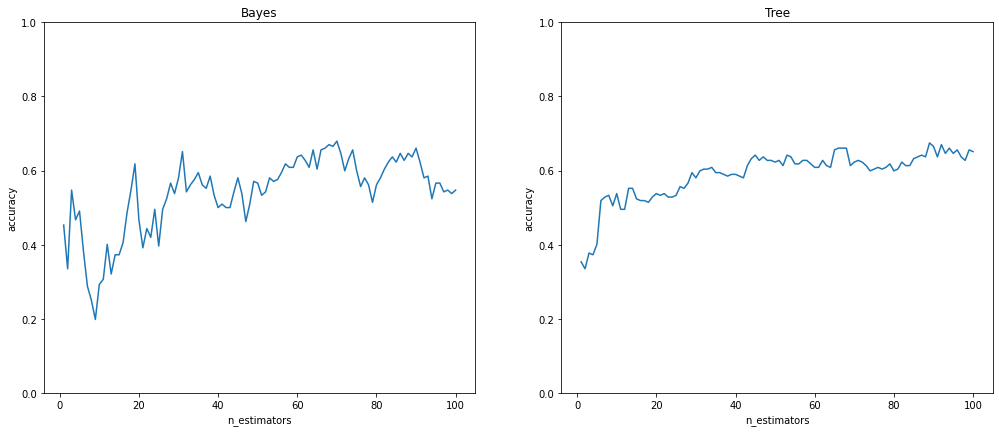

In [27]:
x_vals = list(range(1, 101))

fig = plt.figure(figsize=(17, 15))
for i, (k, v) in enumerate(results.items()):
    ax = fig.add_subplot(2, 2, i+1)
    ax.set_title(k)
    ax.plot(x_vals, v)
    ax.set_xlabel('n_estimators')
    ax.set_ylabel('accuracy')
    ax.set_ylim(0., 1.)
plt.show()

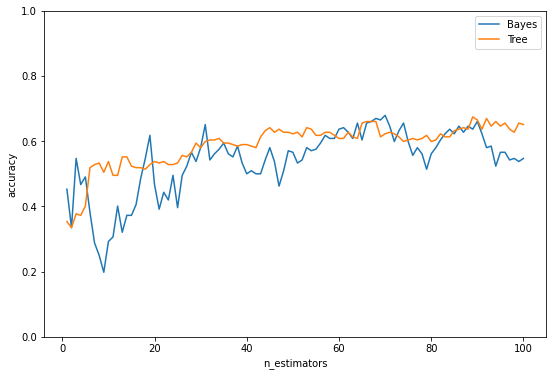

In [28]:
x_vals = list(range(1, 101))
fig = plt.figure(figsize=(9, 6))
legend = list(clf_names)
ax = plt.gca()
ax.set_xlabel('n_estimators')
ax.set_ylabel('accuracy')
ax.set_ylim(0., 1.)
for k, v in results.items():
    ax.plot(x_vals, v)
plt.legend(labels=legend)
plt.show()

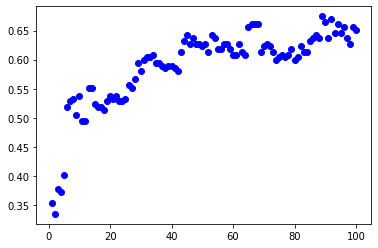

In [16]:
x = list(range(1, 101))
y = [AdaBoostClassifier(n_estimators=i).fit(X_train, y_train).score(X_test, y_test) for i in x]

plt.scatter(x, y, c='b')
plt.show()

# 3

Постройте мета-классификатор для набора данных titanic.csv используя стекинг и оцените качество классификации.

In [29]:
filename = 'titanic.csv'
prefix = os.readlink('requisites')
path = os.path.join(prefix, filename)
df = pd.read_csv(path, index_col=0, converters={
    'Sex': lambda x: {'male': 0, 'female': 1}[x]
}).drop(['Name', 'Ticket', 'Embarked', 'Fare', 'Cabin'], axis=1)
df = df.fillna(0)
df

,Survived,Pclass,Sex,Age,SibSp,Parch
PassengerId,,,,,,
1,0,3,0,22.0,1,0
2,1,1,1,38.0,1,0
3,1,3,1,26.0,0,0
4,1,1,1,35.0,1,0
5,0,3,0,35.0,0,0
...,...,...,...,...,...,...
887,0,2,0,27.0,0,0
888,1,1,1,19.0,0,0
889,0,3,1,0.0,1,2


In [58]:
data = df.to_numpy()
X, y = data[:, 1:], data[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [60]:
clf = StackingClassifier(estimators=[
    ('knn', neighbors.KNeighborsClassifier(n_neighbors=3)),
    ('tree', tree.DecisionTreeClassifier(max_depth=6)),
    ('NB', naive_bayes.GaussianNB())
])
clf.fit(X_train, y_train).score(X_test, y_test)

0.8295964125560538